Estimate the binding fluxes using the methods in Hammes, G. G., Chang, Y.-C., & Oas, T. G. (2009). Conformational selection or induced fit: a flux description of reaction mechanism. Proceedings of the National Academy of Sciences of the United States of America, 106(33), 13737–13741. http://doi.org/10.1073/pnas.0907195106

In [18]:
def solve_free_protein(mdm2_tot,p53_tot,k_d_w,k_d_t,k_eq_wt,alpha=1.):
    k_d_w *= alpha
    k_d_t *= alpha
    a = 1./k_d_w+k_eq_wt/k_d_t
    b = 1.+k_eq_wt-mdm2_tot/k_d_w-k_eq_wt/k_d_t*mdm2_tot+p53_tot/k_d_w+p53_tot*k_eq_wt/k_d_t
    c = -(1.+k_eq_wt)*mdm2_tot
    #print a,b,c
    mdm2_free1 = (-b+(b*b-4.*a*c)**0.5)/(2.*a)
    mdm2_free2 = (-b-(b*b-4.*a*c)**0.5)/(2.*a)
    return max(mdm2_free1,mdm2_free2)

In [3]:
def estimate_flux(p53_tot,k_wt,k_d_w,k_d_t,k_on_t,k_on_w,k_wt_l,mdm2_free):

    p53_w_unbound = p53_tot/(1+mdm2_free/k_d_w+k_eq_wt+k_eq_wt/k_d_t*mdm2_free)
    p53_t_unbound = k_eq_wt*p53_w_unbound
    p53_w_bound = p53_w_unbound/k_d_w*mdm2_free
    #p53_t_bound = k_eq_wt*p53_w_unbound/k_d_t*mdm2_free

    flux_cs = (1/(k_wt*p53_w_unbound)+1/(k_on_t*p53_t_unbound*mdm2_free))**-1
    flux_if = (1/(k_on_w*p53_w_unbound*mdm2_free+1/k_wt_l*p53_w_bound))**-1

    return flux_cs,flux_if

Rates and concentrations from the reference PNAS paper, Figure 3

In [4]:
#c_p53 = 20e-6
#k_d_w = 580./1e8
#k_d_t = 0.025/3e4
#k_eq_wt = 46./0.005

Rates and concentrations from our simulation. Rates are estimated using TPT

In [5]:
c_p53 = 7.1*10**-3 #Mol
c_mdm2 = 7.1*10**-3
# k_off_w/k_on_w = k_unfold_bound_to_unfold_unbound/k_unfold_unbound_to_unfold_bound
#                = 7.120e+06/1.537e+07
k_d_w = 7.120e+06/8.980e+09
# k_off_t/k_on_t = k_fold_bound_to_fold_unbound/k_fold_unbound_to_fold_bound
#                = 1.704e+06/6.565e+06
k_d_t = 1.704e+06/4.709e+10
# k_eq_wt = k_w_to_t/k_t_to_w = k_unfold_unbound_to_fold_unbound/k_fold_unbound_to_unfold_unbound
#                = 6.145e+05/2.162e+06
k_eq_wt = 6.145e+05/2.162e+06
#k_on_t = k_fold_unbound_to_fold_bound = 4.709e+10 1/(M*s)
k_on_t = 4.709e+10
#k_on_w = k_unfold_unbound_to_unfold_bound = 8.980e+09 1/(M*s)
k_on_w = 8.980e+09
#k_wt_l= k_w_to_t_bound = k_unfold_bound_to_fold_bound = 3.126e+06
k_wt_l = 3.126e+06
#k_wt = k_w_to_t_unbound = k_unfold_unbound_to_fold_unbound = 6.145e+05
k_wt = 6.145e+05

In [6]:
mdm2_free = solve_free_protein(mdm2_tot=c_p53, p53_tot=c_p53,
                         k_d_w=k_d_w, k_d_t=k_d_t,
                         k_eq_wt=k_eq_wt, alpha=1)
print mdm2_free

9115.85809896 1.28422756707 -0.00911801572618
0.000932156612795


In [7]:
print estimate_flux(p53_tot=c_p53,k_wt=k_wt
                    ,k_d_w=k_d_w,k_d_t=k_d_t
                    ,k_on_t=k_on_t,k_on_w=k_on_w
                    ,k_wt_l=k_wt_l,mdm2_free=mdm2_free)

(425.0972637910741, 6075.920995680314)


## Fixed the concentration of p53 and vary the concentration of MDM2

### p53 concentration = 7.1 mM from our simulation

In [96]:
import numpy as np

concentrations = 10**(np.arange(-7,0,0.1))

flux_ratio = []

for c_mdm2 in concentrations:
    mdm2_free = solve_free_protein(mdm2_tot=c_mdm2, p53_tot=7.1e-3,
                         k_d_w=k_d_w, k_d_t=k_d_t,
                         k_eq_wt=k_eq_wt, alpha=1)
    flux_cs,flux_if = estimate_flux(p53_tot=c_p53,k_wt=k_wt
                    ,k_d_w=k_d_w,k_d_t=k_d_t
                    ,k_on_t=k_on_t,k_on_w=k_on_w
                    ,k_wt_l=k_wt_l,mdm2_free=mdm2_free)
    print "F_cs:",flux_cs,"F_if:",flux_if,"F_cs/(F_cs+F_if):",flux_cs/(flux_cs+flux_if)
    flux_ratio.append(flux_cs/(flux_cs+flux_if))
    

9115.85809896 66.0059084839 -1.28422756707e-07
F_cs: 16.1059948816 F_if: 10.8065585084 F_cs/(F_cs+F_if): 0.598456588203
9115.85809896 66.0056724511 -1.61674671871e-07
F_cs: 20.2760223579 F_if: 13.6046501761 F_cs/(F_cs+F_if): 0.598453951513
9115.85809896 66.0053753035 -2.03536352862e-07
F_cs: 25.5256449661 F_if: 17.1272383227 F_cs/(F_cs+F_if): 0.598450632125
9115.85809896 66.0050012169 -2.56237086841e-07
F_cs: 32.1343207499 F_if: 21.5619131808 F_cs/(F_cs+F_if): 0.598446453273
9115.85809896 66.0045302696 -3.22583380069e-07
F_cs: 40.4538217428 F_if: 27.144836663 F_cs/(F_cs+F_if): 0.598441192427
9115.85809896 66.0039373822 -4.06108414591e-07
F_cs: 50.9269317218 F_if: 34.1733187022 F_cs/(F_cs+F_if): 0.598434569441
9115.85809896 66.0031909812 -5.11260203072e-07
F_cs: 64.1109699644 F_if: 43.0216498556 F_cs/(F_cs+F_if): 0.598426231638
9115.85809896 66.002251318 -6.43638461686e-07
F_cs: 80.707381624 F_if: 54.1610332572 F_cs/(F_cs+F_if): 0.598415735034
9115.85809896 66.0010683521 -8.10292815425e

### p53 concentration = 7.1 uM

In [97]:
flux_ratio1 = []

for c_mdm2 in concentrations:
    mdm2_free = solve_free_protein(mdm2_tot=c_mdm2, p53_tot=7.1e-6,
                         k_d_w=k_d_w, k_d_t=k_d_t,
                         k_eq_wt=k_eq_wt, alpha=1)
    flux_cs,flux_if = estimate_flux(p53_tot=c_p53,k_wt=k_wt
                    ,k_d_w=k_d_w,k_d_t=k_d_t
                    ,k_on_t=k_on_t,k_on_w=k_on_w
                    ,k_wt_l=k_wt_l,mdm2_free=mdm2_free)
    print "F_cs:",flux_cs,"F_if:",flux_if,"F_cs/(F_cs+F_if):",flux_cs/(flux_cs+flux_if)
    flux_ratio1.append(flux_cs/(flux_cs+flux_if))
    

9115.85809896 1.34803857376 -1.28422756707e-07
F_cs: 785.995435214 F_if: 528.446602393 F_cs/(F_cs+F_if): 0.597968881644
9115.85809896 1.34780254103 -1.61674671871e-07
F_cs: 988.815080541 F_if: 665.164116744 F_cs/(F_cs+F_if): 0.597840095065
9115.85809896 1.34750539343 -2.03536352862e-07
F_cs: 1243.7450586 F_if: 837.216561513 F_cs/(F_cs+F_if): 0.597678038162
9115.85809896 1.34713130676 -2.56237086841e-07
F_cs: 1564.04267349 F_if: 1053.71526297 F_cs/(F_cs+F_if): 0.59747414064
9115.85809896 1.34666035954 -3.22583380069e-07
F_cs: 1966.26158725 F_if: 1326.1086629 F_cs/(F_cs+F_if): 0.597217638921
9115.85809896 1.34606747213 -4.06108414591e-07
F_cs: 2471.0269734 F_if: 1668.77462857 F_cs/(F_cs+F_if): 0.596895023236
9115.85809896 1.3453210711 -5.11260203072e-07
F_cs: 3103.96688141 F_if: 2099.7586842 F_cs/(F_cs+F_if): 0.596489350231
9115.85809896 1.34438140787 -6.43638461686e-07
F_cs: 3896.81553325 F_if: 2641.6916541 F_cs/(F_cs+F_if): 0.595979391257
9115.85809896 1.34319844195 -8.10292815425e-07


In [98]:
%matplotlib inline

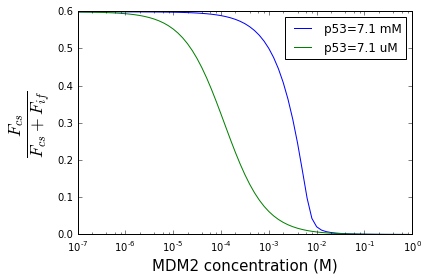

In [99]:
import matplotlib.pyplot as plt

plt.plot(concentrations,flux_ratio)
plt.plot(concentrations,flux_ratio1)
plt.ylabel(r"$\frac{F_{cs}}{F_{cs}+F_{if}}$",fontsize=25)
plt.xlabel(r"MDM2 concentration (M)",fontsize=15)
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend(["p53=7.1 mM","p53=7.1 uM"],loc='best')
plt.xscale('log')


## Fixed the concentration of MDM2 and vary the concentration of p53

### mdm2 = 7.1 mM from simulation

In [100]:
import numpy as np

concentrations = 10**(np.arange(-7,0,0.1))

flux_ratio = []

for c_p53 in concentrations:
    mdm2_free = solve_free_protein(mdm2_tot=7.1e-3, p53_tot=c_p53,
                         k_d_w=k_d_w, k_d_t=k_d_t,
                         k_eq_wt=k_eq_wt, alpha=1)
    flux_cs,flux_if = estimate_flux(p53_tot=c_p53,k_wt=k_wt
                    ,k_d_w=k_d_w,k_d_t=k_d_t
                    ,k_on_t=k_on_t,k_on_w=k_on_w
                    ,k_wt_l=k_wt_l,mdm2_free=mdm2_free)
    print "F_cs:",flux_cs,"F_if:",flux_if,"F_cs/(F_cs+F_if):",flux_cs/(flux_cs+flux_if)
    flux_ratio.append(flux_cs/(flux_cs+flux_if))

9115.85809896 -63.4374533497 -0.00911801572618
F_cs: 0.000924995455483 F_if: 0.0965930229648 F_cs/(F_cs+F_if): 0.00948537993765
9115.85809896 -63.437217317 -0.00911801572618
F_cs: 0.00116450434112 F_if: 0.121603402752 F_cs/(F_cs+F_if): 0.00948541331924
9115.85809896 -63.4369201694 -0.00911801572618
F_cs: 0.00146603053621 F_if: 0.153089600476 F_cs/(F_cs+F_if): 0.00948545534449
9115.85809896 -63.4365460827 -0.00911801572618
F_cs: 0.00184563328592 F_if: 0.192728367068 F_cs/(F_cs+F_if): 0.00948550825167
9115.85809896 -63.4360751355 -0.00911801572618
F_cs: 0.00232353079385 F_if: 0.242630605193 F_cs/(F_cs+F_if): 0.00948557485868
9115.85809896 -63.4354822481 -0.00911801572618
F_cs: 0.00292517755685 F_if: 0.305453781172 F_cs/(F_cs+F_if): 0.00948565871325
9115.85809896 -63.4347358471 -0.00911801572618
F_cs: 0.00368262092707 F_if: 0.384543442636 F_cs/(F_cs+F_if): 0.00948576428195
9115.85809896 -63.4337961838 -0.00911801572618
F_cs: 0.00463620936261 F_if: 0.484111377771 F_cs/(F_cs+F_if): 0.009485

### mdm2 = 7.1 uM 

In [101]:
concentrations = 10**(np.arange(-7,0,0.1))

flux_ratio1 = []

for c_p53 in concentrations:
    mdm2_free = solve_free_protein(mdm2_tot=7.1e-6, p53_tot=c_p53,
                         k_d_w=k_d_w, k_d_t=k_d_t,
                         k_eq_wt=k_eq_wt, alpha=1)
    flux_cs,flux_if = estimate_flux(p53_tot=c_p53,k_wt=k_wt
                    ,k_d_w=k_d_w,k_d_t=k_d_t
                    ,k_on_t=k_on_t,k_on_w=k_on_w
                    ,k_wt_l=k_wt_l,mdm2_free=mdm2_free)
    print "F_cs:",flux_cs,"F_if:",flux_if,"F_cs/(F_cs+F_if):",flux_cs/(flux_cs+flux_if)
    flux_ratio1.append(flux_cs/(flux_cs+flux_if))


9115.85809896 1.22041656037 -9.11801572618e-06
F_cs: 0.00609774728423 F_if: 0.00472345148136 F_cs/(F_cs+F_if): 0.563500164476
9115.85809896 1.22065259311 -9.11801572618e-06
F_cs: 0.00767551081261 F_if: 0.00594548326804 F_cs/(F_cs+F_if): 0.563505920872
9115.85809896 1.22094974071 -9.11801572618e-06
F_cs: 0.00966115560768 F_if: 0.00748335175169 F_cs/(F_cs+F_if): 0.563513165189
9115.85809896 1.22132382738 -9.11801572618e-06
F_cs: 0.0121599176284 F_if: 0.00941849734157 F_cs/(F_cs+F_if): 0.563522281192
9115.85809896 1.22179477459 -9.11801572618e-06
F_cs: 0.0153040623588 F_if: 0.0118532504512 F_cs/(F_cs+F_if): 0.563533751144
9115.85809896 1.22238766201 -9.11801572618e-06
F_cs: 0.019259756015 F_if: 0.0149161257839 F_cs/(F_cs+F_if): 0.5635481808
9115.85809896 1.22313406304 -9.11801572618e-06
F_cs: 0.0242356418618 F_if: 0.0187684209198 F_cs/(F_cs+F_if): 0.563566330578
9115.85809896 1.22407372627 -9.11801572618e-06
F_cs: 0.0304935203484 F_if: 0.0236124185496 F_cs/(F_cs+F_if): 0.563589154342
9115

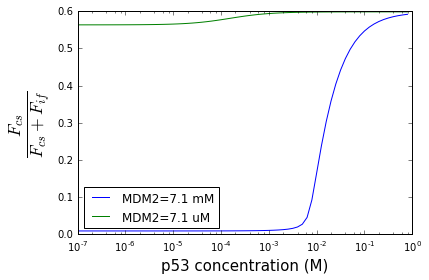

In [102]:
import matplotlib.pyplot as plt

plt.plot(concentrations,flux_ratio)
plt.plot(concentrations,flux_ratio1)
plt.ylabel(r"$\frac{F_{cs}}{F_{cs}+F_{if}}$",fontsize=25)
plt.xlabel(r"p53 concentration (M)",fontsize=15)
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.legend(["MDM2=7.1 mM","MDM2=7.1 uM"],loc='best')
plt.xscale('log')